# The Electric Vehicle market in India using Segmentation analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

# Data Collection

In [5]:
df1= pd.read_csv('behaviroual_dataset.csv')
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


# EDA

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [8]:
df1.shape

(99, 8)

In [9]:
df1.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

<AxesSubplot:>

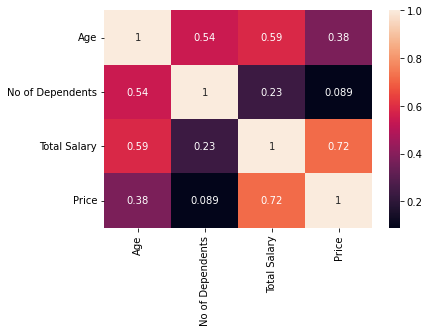

In [11]:
sns.heatmap(df1.corr(), annot=True)

# Data Visualization

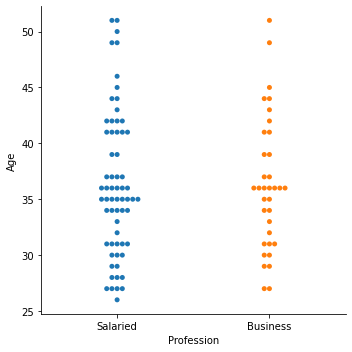

In [25]:
sns.catplot(x="Profession", y="Age",  kind="swarm", data=df1)

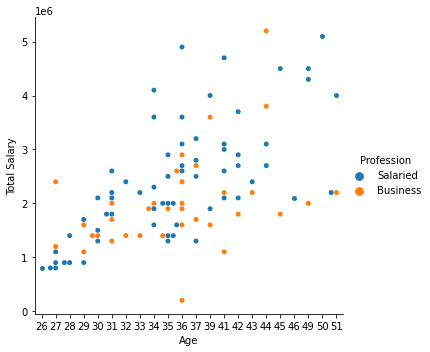

In [16]:
sns.catplot(x="Age", y="Total Salary", hue="Profession", kind="swarm", data=df1)

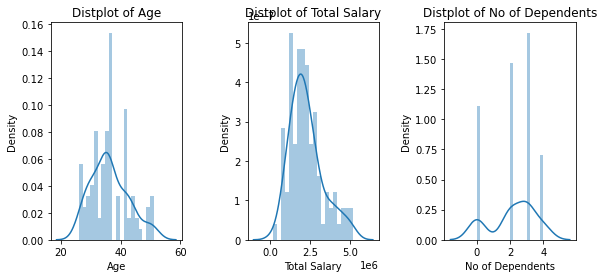

In [12]:
plt.figure(1, figsize=(20,4))
n=0
for x in ['Age','Total Salary'  ,'No of Dependents']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df1[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

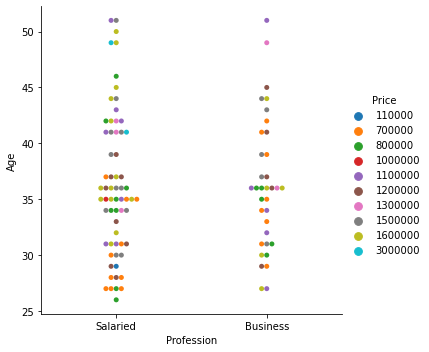

In [13]:
sns.catplot(x="Profession", y="Age",  hue="Price" ,kind="swarm", data=df1)

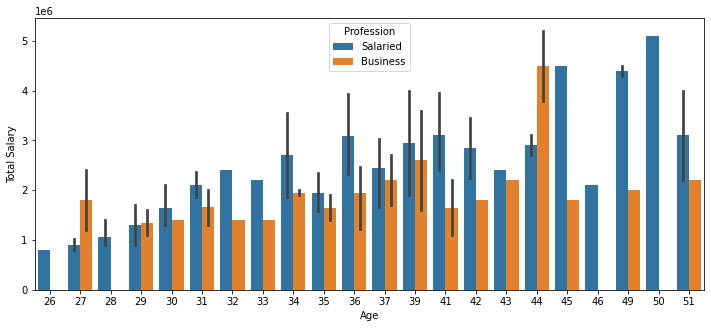

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'Age',y = 'Total Salary',hue = 'Profession',data = df1)
plt.show()

In [14]:
df1.drop(columns=['Price'],inplace=True)
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary
0,27,Salaried,Single,Post Graduate,0,Yes,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000
2,45,Business,Married,Graduate,4,Yes,1800000
3,41,Business,Married,Post Graduate,3,No,2200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000


In [15]:
df1.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary'],
      dtype='object')

In [16]:
col_list=[]
for col in df1.columns:
    if(df1[col].dtype=='object'):
        col_list.append(col)
col_list

['Profession', 'Marrital Status', 'Education', 'Personal loan']

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder=LabelEncoder()

In [23]:
for i in col_list:
    df1[i]=label_encoder.fit_transform(df1[i])

In [33]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary
0,27,1,1,1,0,1,800000
1,35,1,0,1,2,1,2000000
2,45,0,0,0,4,1,1800000
3,41,0,0,1,3,0,2200000
4,31,1,0,1,2,1,2600000


In [26]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df1)

pca = PCA(n_components=7)
pc = pca.fit_transform(df1)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.470707e+06,-4.397408,-1.167728,-0.745547,0.521232,0.381519,0.292923
1,-2.707071e+05,-0.372004,0.016903,-0.659672,0.483447,0.285358,-0.267208
2,-4.707071e+05,10.514879,0.559523,0.626054,0.457038,0.414006,0.113824
3,-7.070707e+04,5.011009,0.123104,0.035773,-0.735681,0.330984,-0.045964
4,3.292929e+05,-6.430356,0.692948,-0.584766,0.460235,0.397497,-0.274566


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1_standard=scaler.fit_transform(df1)

In [35]:
df1_standard

array([[-1.4986304 ,  0.73950997,  2.36643191,  0.87627458, -1.64231252,
         1.44697961, -1.40676   ],
       [-0.21130364,  0.73950997, -0.42257713,  0.87627458, -0.13685938,
         1.44697961, -0.25893659],
       [ 1.39785482, -1.35224681, -0.42257713, -1.1411948 ,  1.36859377,
         1.44697961, -0.4502405 ],
       [ 0.75419144, -1.35224681, -0.42257713,  0.87627458,  0.6158672 ,
        -0.69109474, -0.06763269],
       [-0.85496702,  0.73950997, -0.42257713,  0.87627458, -0.13685938,
         1.44697961,  0.31497511],
       [-1.33771455,  0.73950997, -0.42257713, -1.1411948 ,  0.6158672 ,
         1.44697961, -1.31110805],
       [-0.85496702,  0.73950997, -0.42257713, -1.1411948 ,  1.36859377,
        -0.69109474, -0.4502405 ],
       [-0.53313533, -1.35224681, -0.42257713,  0.87627458,  1.36859377,
        -0.69109474, -0.8328483 ],
       [-0.37221948, -1.35224681, -0.42257713,  0.87627458,  1.36859377,
        -0.69109474, -0.25893659],
       [-0.37221948,  0.7395

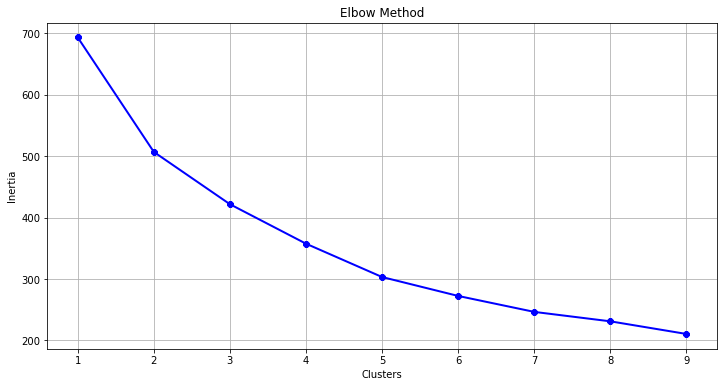

In [36]:
from sklearn.cluster import KMeans  
clusters = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df1_standard)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),clusters, linewidth=2, color="blue", marker ="8")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,10,1))
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pf.iloc[:,:2])

KMeans(n_clusters=4)

In [40]:
y_kmeans = kmeans.predict(pf.iloc[:,:2])
print(y_kmeans.shape)

(99,)


In [41]:
y_kmeans

array([3, 1, 1, 1, 0, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 0, 1,
       0, 3, 1, 0, 3, 1, 0, 0, 3, 1, 0, 1, 1, 2, 1, 1, 3, 1, 1, 3, 0, 1,
       1, 2, 3, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 0, 3, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 3, 1,
       2, 1, 3, 2, 0, 3, 0, 2, 1, 2, 1])

In [43]:
df1['Cluster'] = y_kmeans
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Cluster
0,27,1,1,1,0,1,800000,3
1,35,1,0,1,2,1,2000000,1
2,45,0,0,0,4,1,1800000,1
3,41,0,0,1,3,0,2200000,1
4,31,1,0,1,2,1,2600000,0


# Cluster Plotting

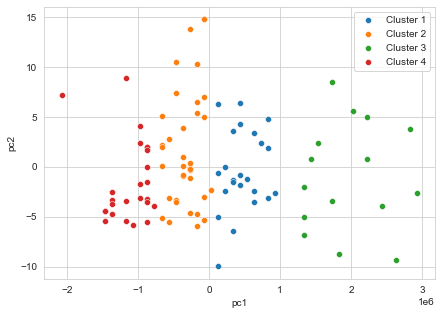

In [46]:
dfc1 =pf[df1.Cluster==0]
dfc2 =pf[df1.Cluster==1]
dfc3 =pf[df1.Cluster==2]
dfc4 =pf[df1.Cluster==3]

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = 7,5

sns.scatterplot(dfc1['pc1'],dfc1['pc2'])
sns.scatterplot(dfc2['pc1'],dfc2['pc2'])
sns.scatterplot(dfc3['pc1'],dfc3['pc2'])
sns.scatterplot(dfc4['pc1'],dfc4['pc2'])

plt.legend(labels=["Cluster 1","Cluster 2","Cluster 3","Cluster 4"])